# Uy narxi
UY narxini bashorat qiladigan model yaratish 
# PyTorch


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data  import random_split ,  Dataset , DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("/home/ozodbek/Documents/PyTorch/Model/dataset/house_price_regression_dataset.csv")
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
df.isna().sum().sum()

np.int64(0)

In [19]:
correlyatsiya = df.corr()
correlyatsiya['House_Price'].sort_values(ascending=False)

House_Price             1.000000
Square_Footage          0.991261
Lot_Size                0.160412
Garage_Size             0.052133
Year_Built              0.051967
Num_Bedrooms            0.014633
Num_Bathrooms          -0.001862
Neighborhood_Quality   -0.007770
Name: House_Price, dtype: float64

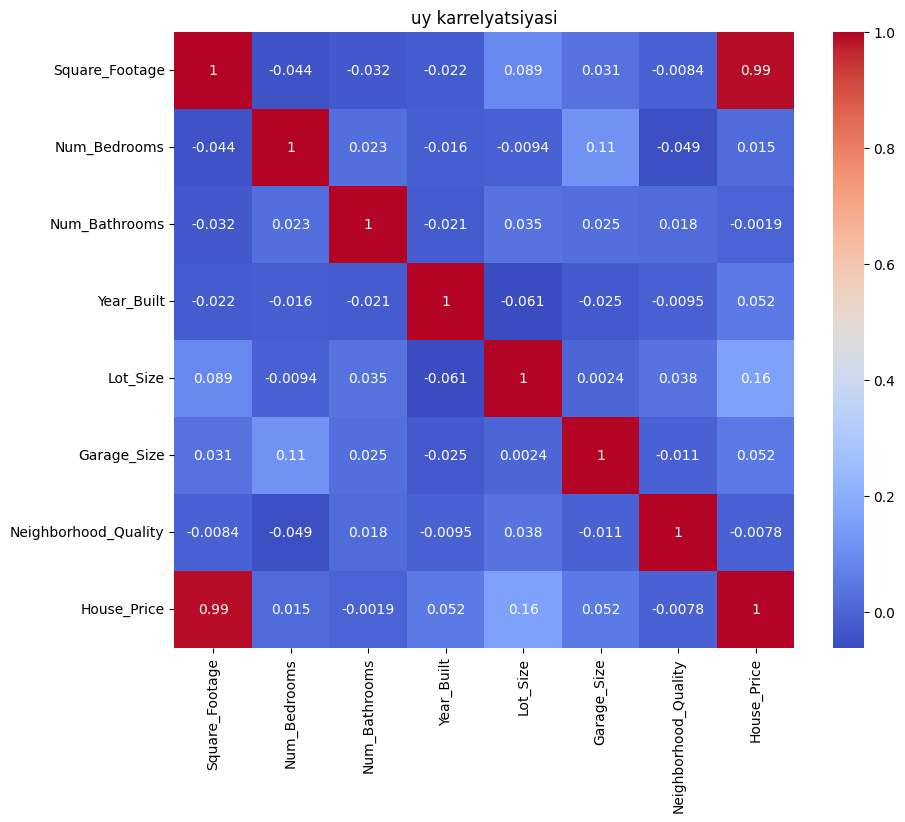

In [17]:
plt.figure(figsize=(10,8)) 
sns.heatmap(correlyatsiya , annot=True , cmap="coolwarm")
plt.title("uy karrelyatsiyasi")
plt.show()

In [32]:
# Dataset yaratish
class HouseDataset(Dataset):
    def __init__(self , df):
        self.data = pd.read_csv(df)
        
        self.X = self.data.drop("House_Price" , axis=1).values # Regressiya uchun shu
        
        self.y = self.data["House_Price"].values # Regressiya uchun shu 
        
    
    def  __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        X_tensor = torch.tensor(self.X[index] , dtype=torch.float32)
        y_tensor = torch.tensor(self.y[index] , dtype=torch.float32)
        
        return X_tensor , y_tensor

In [35]:
dataset = HouseDataset("/home/ozodbek/Documents/PyTorch/Model/dataset/house_price_regression_dataset.csv")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
X_train  , X_test  = random_split(dataset , [train_size , test_size])


train_loader = DataLoader(X_train , batch_size=32 , shuffle=True)
test_loader = DataLoader(X_test ,  batch_size=32 , shuffle=False)


In [40]:
# Model build

class HouseModel(nn.Module):
    def __init__(self , input_dim):
        super(HouseModel , self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim , 64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1)
        )
        
    def forward(self , x ):
        return self.layers(x)

In [41]:
input_dim = dataset.X.shape[1]
model = HouseModel(input_dim)
model

HouseModel(
  (layers): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [42]:
# Loss va optimizer yaratish
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters() , lr=0.001)

In [44]:
# Model yaratish

epochs = 20


for epoch in range(epochs):
    model.train()
    total_loss = 0
    
    for X_batch , y_batch  in train_loader:
        # Forward 
        preds = model(X_batch).squeeze()
        loss =loss_fn(preds  ,  y_batch)
        
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    natija = total_loss / len(train_loader)
    print(f"Epoch: {epoch+1} , Loss: {natija}")

Epoch: 1 , Loss: 425208969953.28
Epoch: 2 , Loss: 411686128844.8
Epoch: 3 , Loss: 387581854351.36
Epoch: 4 , Loss: 349728515686.4
Epoch: 5 , Loss: 297694322360.32
Epoch: 6 , Loss: 234694555729.92
Epoch: 7 , Loss: 166892937216.0
Epoch: 8 , Loss: 104603282964.48
Epoch: 9 , Loss: 56467589857.28
Epoch: 10 , Loss: 27231768616.96
Epoch: 11 , Loss: 14061910671.36
Epoch: 12 , Loss: 9829146951.68
Epoch: 13 , Loss: 8813104988.16
Epoch: 14 , Loss: 8515722321.92
Epoch: 15 , Loss: 8328813260.8
Epoch: 16 , Loss: 8141896622.08
Epoch: 17 , Loss: 7962629632.0
Epoch: 18 , Loss: 7773710807.04
Epoch: 19 , Loss: 7589346795.52
Epoch: 20 , Loss: 7401651394.56


In [45]:
# Modelni  test qilish

model.eval()
with torch.no_grad():
    total_loss = 0
    for x_batch , y_batch in test_loader:
        preds = model(x_batch).squeeze()
        loss = loss_fn(preds ,y_batch)
        total_loss += loss.item()
    print(f"Test loss: {total_loss / len(test_loader):.4f}")

Test loss: 7497087926.8571


In [47]:
from sklearn.metrics import r2_score

model.eval()
with torch.no_grad():
    preds_list = []
    y_list = []
    for X_batch, y_batch in test_loader:
        preds = model(X_batch).squeeze()
        preds_list.extend(preds.numpy())
        y_list.extend(y_batch.numpy())

r2 = r2_score(y_list, preds_list)
print(f"R² score: {r2:.4f}")


R² score: 0.8879
